DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


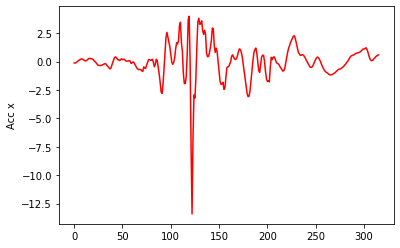

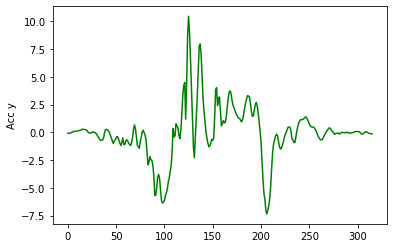

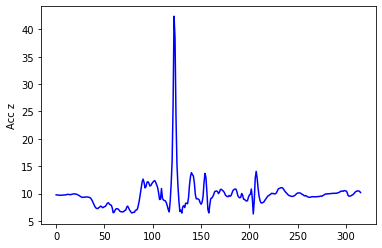

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

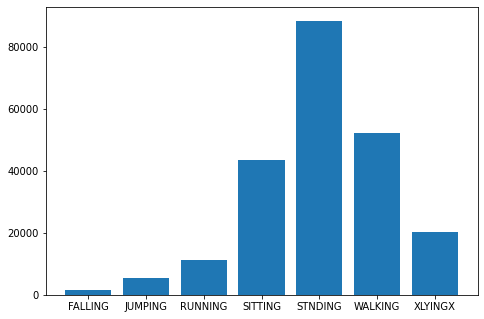

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [10]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [11]:
import data_transformation as dt

#X_data, y_data = dt.data_augmentation(X_data, y_data, [dt.jitter, dt.scaling, dt.rotation])

FALLING


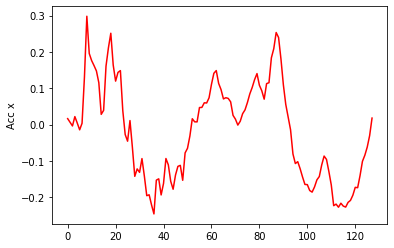

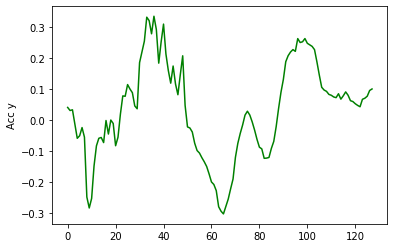

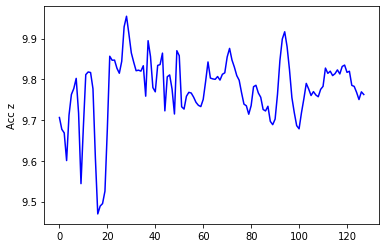

In [12]:
measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)

In [14]:
#check https://stackoverflow.com/questions/59979763/cant-get-done-conv1d-with-tf-keras
#check https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [15]:
#fig, axs = plt.subplots(3, 2)
#fig.set_figheight(15)
#fig.set_figwidth(15)
#axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
#axs[0, 0].set_title('Real Acc x')
#axs[0, 1].plot(X_prova[measure,:,0], 'tab:red')
#axs[0, 1].set_title('Pred Acc x')
#
#axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
#axs[1, 0].set_title('Real Acc y')
#axs[1, 1].plot(X_prova[measure,:,1], 'tab:green')
#axs[1, 1].set_title('Pred Acc y')
#
#axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
#axs[2, 0].set_title('Real Acc 1')
#axs[2, 1].plot(X_prova[measure,:,2], 'tab:blue')
#axs[2, 1].set_title('Pred Acc 1')

In [16]:
#X_train_norm = np.linalg.norm(X_train[:,:,0:3], axis=2, keepdims=True)
#X_test_norm = np.linalg.norm(X_test[:,:,0:3], axis=2, keepdims=True)
#X_train = np.concatenate([X_train, X_train_norm], axis=2)
#X_test = np.concatenate([X_test, X_test_norm], axis=2)

In [17]:
print(X_train.shape)

(155666, 128, 6)


In [18]:
from data_transformation import data_normalization

X_train = data_normalization(X_train)
X_test = data_normalization(X_test)

2021-08-25 14:13:52.159571: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-25 14:13:52.159712: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


# Classification NN

In [19]:
class InceptionBlock(tf.keras.layers.Layer):
  def __init__(self):
      super().__init__()
      #Branch 1
      self.b1_1x1 = layer.Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')
      #Branch 2
      self.b2_1x1 = layer.Conv1D(filters=32, kernel_size=1, activation='relu', padding='same')
      self.b2_1x3 = layer.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')
      #Branch 3
      self.b3_1x1 = layer.Conv1D(filters=32, kernel_size=1, activation='relu', padding='same')
      self.b3_1x5 = layer.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')
      #Branch 4
      self.b4_pool = layer.MaxPooling1D(pool_size=3, strides=1, padding='same')
      self.b4_1x1 = layer.Conv1D(filters=64, kernel_size=1, strides=1, activation='relu', padding='same')

  def call(self, x):
    branch1 = self.b1_1x1(x)

    branch2 = self.b2_1x1(x)
    branch2 = self.b2_1x3(branch2)

    branch3 = self.b3_1x1(x)
    branch3 = self.b3_1x5(branch3)

    branch4 = self.b4_pool(x)
    branch4 = self.b4_1x1(x)

    return tf.concat(values=[branch1, branch2, branch3, branch4], axis=-1)


In [20]:
class InceptionBlockV2(tf.keras.layers.Layer):
  def __init__(self, num_filters, activation='relu'):
      super().__init__()
      self.activation = layer.Activation(activation)
      #Branch 1
      self.bottleneck = layer.Conv1D(filters=num_filters, kernel_size=1, activation='relu', padding='same')
      self.conv1 = layer.Conv1D(filters=num_filters, kernel_size=10, activation='relu', padding='same')
      self.conv2 = layer.Conv1D(filters=num_filters, kernel_size=20, activation='relu', padding='same')
      self.conv3 = layer.Conv1D(filters=num_filters, kernel_size=40, activation='relu', padding='same')
      #Branch 2
      self.pool = layer.MaxPooling1D(pool_size=3, strides=1, padding='same')
      self.conv4 = layer.Conv1D(filters=num_filters, kernel_size=1, strides=1, activation='relu', padding='same')

      self.bn = layer.BatchNormalization()

  def call(self, x):
    branch1 = self.bottleneck(x)
    out_conv1 = self.conv1(branch1)
    out_conv2 = self.conv2(branch1)
    out_conv3 = self.conv3(branch1)

    branch2 = self.pool(x)
    out_conv4 = self.conv4(branch2)
    Z = tf.concat(values=[out_conv1, out_conv2, out_conv3, out_conv4], axis=-1)
    Z = self.bn(Z)
    return self.activation(Z)

In [21]:
def InceptionModel(num_labels):
    return tf.keras.Sequential([
        InceptionBlock(),
        InceptionBlock(),
        InceptionBlock(),
        layer.MaxPooling1D(pool_size=2, padding='same'),
        InceptionBlock(),
        layer.MaxPooling1D(pool_size=2, padding='same'),
        layer.GRU(120, return_sequences=True),
        layer.GRU(40),
        layer.Dense(num_labels, activation='softmax'),
    ])

def skip_layer(input, Z_inception):
    Z_short = layer.Conv1D(filters=Z_inception.shape[-1], kernel_size=1, padding='same', use_bias=False)(input)
    Z_short = layer.BatchNormalization()(Z_short)
    Z_out = layer.Add()([Z_inception, Z_short])
    return layer.Activation('relu')(Z_out)

def buildInceptionModelV2(input_shape, num_classes, num_modules):
    input_layer = tf.keras.layers.Input(input_shape)
    Z = input_layer
    Z_res = input_layer
    for i in range(num_modules):
        Z = InceptionBlockV2(num_filters=32)(Z)
        if i % 3 == 0:
            Z = skip_layer(Z_res, Z)
            Z = Z_res
    gap_layer = layer.GlobalAveragePooling1D()(Z)
    output_layer = layer.Dense(num_classes, activation='softmax')(gap_layer)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model


In [22]:
block = InceptionBlockV2(5)
block(X_train[:10]).shape

TensorShape([10, 128, 20])

In [23]:
from models import ConvolutionalClassificationNN
  

model = buildInceptionModelV2((128, 6), num_labels, 6)

model_test_data = X_train[0:10, :, :]
x = model(model_test_data)
print(x.shape)

(10, 7)


In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 6)]          0         
_________________________________________________________________
inception_block_v2_5 (Incept (None, 128, 128)          72736     
_________________________________________________________________
inception_block_v2_6 (Incept (None, 128, 128)          80544     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 7)                 903       
Total params: 154,183
Trainable params: 153,671
Non-trainable params: 512
_________________________________________________________________


In [25]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=False)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [26]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [27]:
from sklearn.utils import class_weight

class_weights_list = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = {}
for i in range(num_labels):
  w = class_weights_list[i]
  class_weights[i] = w
print(class_weights)

{0: 22.193612774451097, 1: 5.707905544147844, 2: 2.8631389210763487, 3: 0.7321634346294407, 4: 0.3592974972937166, 5: 0.6094105395851032, 6: 1.5612187587756248}


/Users/denisderonjic/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5 6], y=[4 5 5 ... 4 4 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [28]:
#from focal_loss import SparseCategoricalFocalLoss

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
#loss_object = SparseCategoricalFocalLoss(gamma=2.0)
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss_object, metrics=['acc'])


In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc', patience=5)
history = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=256,
                validation_split=0.2,
                #class_weight=class_weights,
                callbacks=[callback])

Epoch 1/10
487/487 [==============================] - 96s 197ms/step - loss: 0.5616 - acc: 0.7934 - val_loss: 0.5363 - val_acc: 0.7782
Epoch 2/10
487/487 [==============================] - 96s 198ms/step - loss: 0.3330 - acc: 0.8756 - val_loss: 0.3318 - val_acc: 0.8755
Epoch 3/10
487/487 [==============================] - 96s 197ms/step - loss: 0.2613 - acc: 0.9032 - val_loss: 0.2634 - val_acc: 0.9004
Epoch 4/10
487/487 [==============================] - 97s 199ms/step - loss: 0.2179 - acc: 0.9195 - val_loss: 0.2139 - val_acc: 0.9214
Epoch 5/10
487/487 [==============================] - 97s 199ms/step - loss: 0.1853 - acc: 0.9323 - val_loss: 0.1882 - val_acc: 0.9298
Epoch 6/10
487/487 [==============================] - 96s 198ms/step - loss: 0.1589 - acc: 0.9421 - val_loss: 0.2260 - val_acc: 0.9167
Epoch 7/10
487/487 [==============================] - 96s 197ms/step - loss: 0.1413 - acc: 0.9484 - val_loss: 0.1870 - val_acc: 0.9279
Epoch 8/10
487/487 [==============================] - 9

In [30]:
#model.save('inception_model.h5')

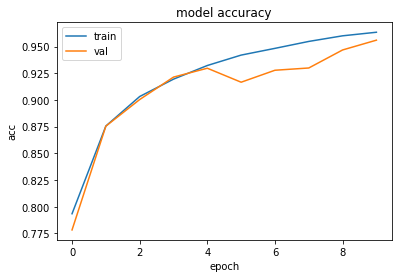

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
from sklearn.model_selection import KFold

results = []
kf = KFold(n_splits=5)
for train_idx, val_idx in kf.split(X_train, y_train):
  #train_x = X_train[train_idx]
  #train_y = y_train[train_idx]
  val_x = X_train[val_idx]
  val_y = y_train[val_idx]
  loss, acc = model.evaluate(val_x, val_y)
  results.append(acc)
print(results)
print(np.mean(results))

973/973 [==============================] - 13s 13ms/step - loss: 0.1226 - acc: 0.9561
[0.9659857153892517, 0.9650852680206299, 0.9672694802284241, 0.965888261795044, 0.9560595154762268]
0.9640576481819153


In [37]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2085/2085 - 22s - loss: 0.1182 - acc: 0.9576


In [38]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [39]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
print("Precision score: ", precision_score(y_test, y_pred, average='macro'))
print("Recall score: ", recall_score(y_test, y_pred, average='macro'))

Precision score:  0.9496701835136789
Recall score:  0.923977890508312


In [42]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.93593315 0.88988262 0.99482023 0.91594138 0.95743889 0.99320513
 0.96046989]
Recall score:  [0.78321678 0.95329341 0.98077501 0.94591688 0.9701802  0.99072831
 0.84373464]


In [43]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " --- Recall " + str(recalls[i]))

FALLING: Precision 0.935933147632312 --- Recall 0.7832167832167832
JUMPING: Precision 0.8898826159865847 --- Recall 0.9532934131736527
RUNNING: Precision 0.9948202315661182 --- Recall 0.9807750075097627
SITTING: Precision 0.9159413821319646 --- Recall 0.9459168779288623
STNDING: Precision 0.957438892815953 --- Recall 0.9701802005579432
WALKING: Precision 0.9932051282051282 --- Recall 0.9907283074365368
XLYINGX: Precision 0.9604698862576916 --- Recall 0.8437346437346437


In [44]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.8527918781725888
JUMPING: F1-score 0.9204972535414859
RUNNING: F1-score 0.9877476932385418
SITTING: F1-score 0.9306878306878307
STNDING: F1-score 0.9637674375058516
WALKING: F1-score 0.9919651717404526
XLYINGX: F1-score 0.8983257760725497


In [40]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

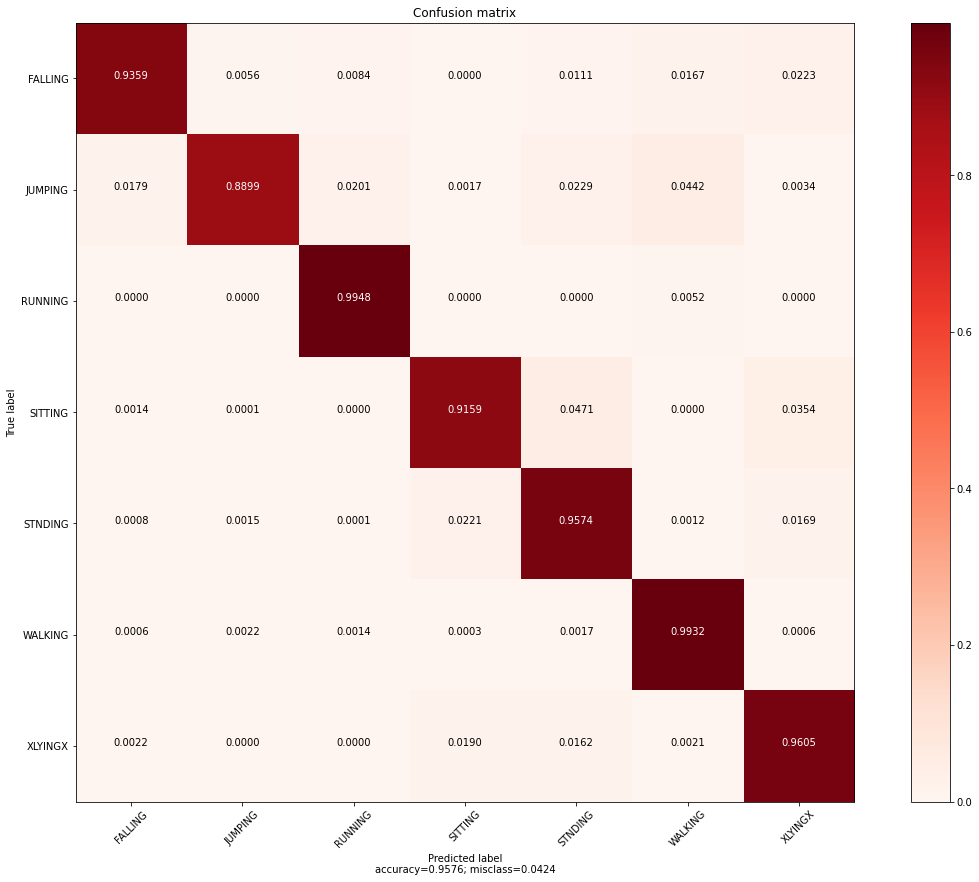

In [41]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)